# Day074
## Gradient Descent數學式

### 梯度 Gradient
在微積分裡面，對多元函數的參數求 $\partial$ 偏導數，把求得的各個參數的偏導數以向量的形式寫出來，就是梯度。

比如函數f(x), 對x求偏導數，求得的梯度向量就是 $\frac{\partial{f}}{\partial{x}}$ , 簡稱grad f(x)或者 $\bigtriangledown  f(x)$


### 梯度下降法
給定起始點與目標函數的一階導函數(偏導數)，求在epochs次迭代中x的更新值

$y = w\cdot x$ (_為了計算方便，假設 w = x_)，所以 $y = x^2$ 

一階導數: $\frac{dy}{dx}=2x$

$v$ 表示 w 要改變的幅度 $v=-\frac{dy}{dx} \cdot lr$

$w\leftarrow w + v$

### 數學式說明:

learning rate is 0.3
[ 3.         -0.6        -2.04       -2.616      -2.8464     -2.93856
 -2.975424   -2.9901696  -2.99606784 -2.99842714 -2.99937085 -2.99974834
 -2.99989934 -2.99995973 -2.99998389 -2.99999356 -2.99999742 -2.99999897
 -2.99999959 -2.99999984 -2.99999993]

learning rate is 0.01
[3.         2.88       2.7624     2.647152   2.53420896 2.42352478
 2.31505429 2.2087532  2.10457814 2.00248657 1.90243684 1.8043881
 1.70830034 1.61413434 1.52185165 1.43141462 1.34278632 1.2559306
 1.17081199 1.08739575 1.00564783]

learning rate is 0.98
[ 3.         -8.76        2.5296     -8.308416    2.09607936 -7.89223619
  1.69654674 -7.50868487  1.32833747 -7.15520397  0.98899582 -6.82943598
  0.67625854 -6.5292082   0.38803987 -6.25251828  0.12241755 -5.99752085
 -0.12237999 -5.76251521 -0.3479854 ]



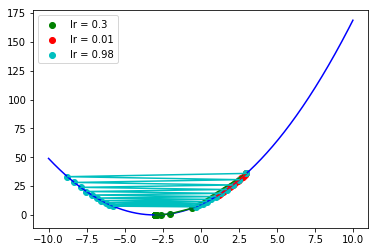

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

#目標函數 y = (x+3)^2
y = lambda x: np.square(x+3)
#目標函數一階導數
dy = lambda x: 2*(x + 3)

def GD(w_init, df, epochs, lr):
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param w_init: w的init value    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置   
    """
    x_history = np.zeros(epochs + 1) # 把 "epochs+1" 轉成dtype=np.float32  
    x = w_init
    x_history[0] = x
    for i in range(epochs):
        dx = df(x)
        x -= dx*lr
        x_history[i + 1] = x
    return x_history

# 起始權重
w_init = 3    
# 執行週期數
epochs = 20 
# 學習率   
lr_list = [(0.3, 'g'), (0.01, 'r'), (0.98, 'c')]

#劃出曲線圖
t = arange(-10.0, 10.0, 0.01)
plt.plot(t, y(t), c='b')

# 梯度下降法 
for lr, color in lr_list:
    x = GD(w_init, dy, epochs, lr=lr)
    print(f"learning rate is {lr}", x, sep='\n')
    print()
    
    #描出GD
    plt.plot(x, y(x), c=color)
    plt.scatter(x, y(x), c=color, label=f'lr = {lr}')
    plt.legend()

plt.show()

> 由公式計算可知最低點在 $x=-3$ ，當 lr 太小時，20次迭代無法找到最小值，lr 較大時，容易在搜索過程中發生震盪，而發生震盪的根本原因無非就是搜索的步長邁的太大了 如果讓能夠lr隨著迭代週期不斷衰減變小，那麼搜索時邁的步長就能不斷減少以減緩震盪，學習率衰減因子由此誕生。

### 學習率衰減公式

$$lr_i = \frac{lr_{start} \times 1.0}{1.0 + decay \times i}$$


其中 $lr_i$ 為第一迭代 i 時的學習率，$lr_{start}$ 為原始學習率，decay為一個介於[0.0, 1.0]的小數。從公式上可看出：

- decay越小，學習率衰減地越慢，當decay = 0時，學習率保持不變。
- decay越大，學習率衰減地越快，當decay = 1時，學習率衰減最快

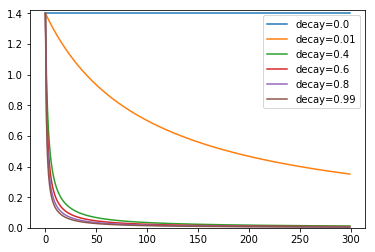

In [2]:
def GD_decay(w_init, df, epochs, lr, decay):
    x_history = np.zeros(epochs+1)
    x = w_init
    x_history[0] = x
    for i in range(epochs):
        dx = df(x)
        lr_i = lr*1.0 / (1.0 + decay * i)
        x -= lr_i*dx
        x_history[i+1] = x
    return x_history

line_x = np.linspace(-5, 5, 100)
line_y = y(line_x)
plt.figure('Gradient Desent: Decay')

lr = 1.4
iterations = np.arange(300)
decay = [0.0, 0.01, 0.4, 0.6, 0.8, 0.99]

for decay in decay:
    decay_lr = lr * (1.0 / (1.0 + decay * iterations))
    plt.plot(iterations, decay_lr, label=f'decay={decay}')

plt.ylim([0, 1.42])
plt.legend(loc='best')
plt.show()

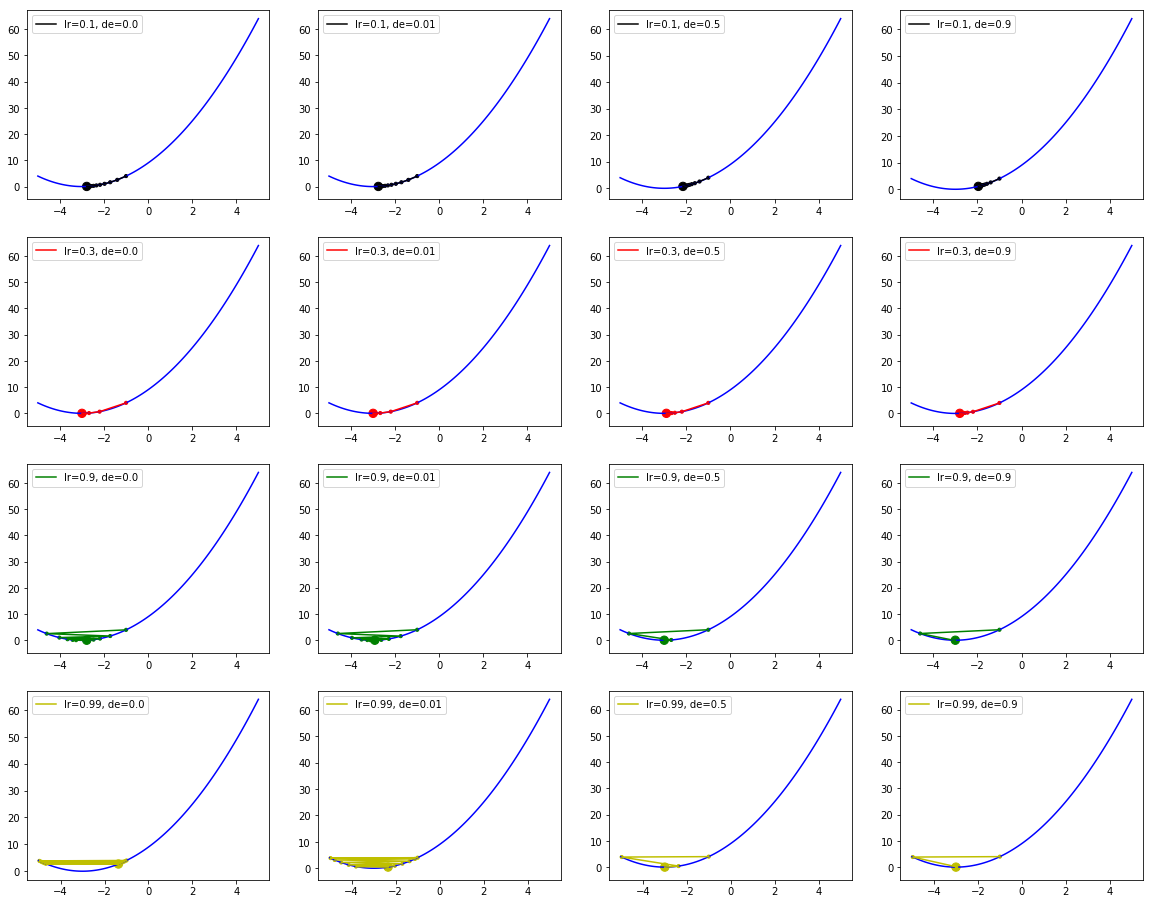

In [3]:
line_x = np.linspace(-5, 5, 100)
line_y = y(line_x)
plt.figure('Gradient Desent: Decay', figsize=(20,16))


x_start = -1
epochs = 10

lr = [0.1, 0.3, 0.9, 0.99]
decay = [0.0, 0.01, 0.5, 0.9]

color = ['k', 'r', 'g', 'y']

row = len(lr)
col = len(decay)
size = np.ones(epochs + 1) * 10
size[-1] = 70

for i in range(row):
     for j in range(col):
        x = GD_decay(x_start, dy, epochs, lr=lr[i], decay=decay[j])
        plt.subplot(row, col, i * col + j + 1)
        plt.plot(line_x, line_y, c='b')
        plt.plot(x, y(x), c=color[i], label=f'lr={lr[i]}, de={decay[j]}')
        plt.scatter(x, y(x), c=color[i], s=size)
        plt.legend(loc=0)
plt.show()

> 衰減越大，學習率衰減地越快，確實能夠對震盪起到減緩的作用

### Momentum (動量)
為什麼要有動量?

是為了要解決
1. 學習率較小時，收斂到極值的速度較慢。
2. 學習率較大時，容易在搜索過程中發生震盪。

當使用動量時，會把每次 $w$ 的更新量 $v$ 改為本次的梯度下降量($-dx\cdot lr$)與上次 $w$ 的更新量 $v$ 乘上一個介於[0, 1]的因子momentum的和

$w \leftarrow x - \alpha \cdot dw$ (x沿負梯度方向下降)

$v = \beta \cdot v - \alpha \cdot dw$

$w \leftarrow w + v$

$\beta$ 即momentum係數，通俗的理解上面式子就是，如果上一次的momentum與這一次的負梯度方向是相同的，那這次下降的幅度就會加大，所以這樣做能夠達到加速收斂的過程。

如果上一次的momentum與這一次的負梯度方向是相反的，那這次下降的幅度就會縮減，所以這樣做能夠達到減速收斂的過程。



## 範例

$ y_{data} = b + w \cdot x_{data }$

In [4]:
import random as random
import csv

# 給定曲線的曲線範圍
x_data = [ 338., 333., 328., 207., 226., 25., 179.,  60., 208.,  606.]
y_data = [ 640., 633., 619., 393., 428., 27., 193.,  66., 226., 1591.]

# 給定神經網路參數 bias跟weight
x = np.arange(-200,-100,1) #給定bias
y = np.arange(-5,5,0.1) #給定weight
Z = np.zeros((len(x), len(y)))

#meshgrid返回的兩個矩陣X、Y必定是行數、列數相等的
#meshgrid函數用兩個坐標軸上的點在平面上畫格。
X, Y = np.meshgrid(x, y)

for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] +  (y_data[n] - b - w*x_data[n])**2

        Z[j][i] = Z[j][i]/len(x_data)

In [5]:
# ydata = b + w * xdata 
b = -120 # initial b
w = -4 # initial w
lr = 0.000001 # learning rate
iteration = 100000

# Store initial values for plotting.
b_history = [b]
w_history = [w]

#給定初始值
lr_b = 0.0
lr_w = 0.0

In [6]:
'''
Loss = (實際ydata – 預測ydata)
Gradient = -2*input * Loss 
調整後的權重 = 原權重 – Learning * Gradient
'''
# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):        
        b_grad = b_grad  - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad  - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
        
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    # Update parameters.
    b = b - lr * b_grad 
    w = w - lr * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)

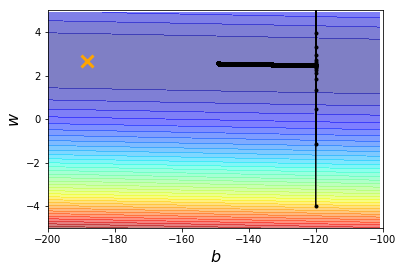

In [7]:
# plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

## 作業:
其實就是範例以前的部分。